# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Andika Syarif Hidayatullah
- **Email:** vextoz0302@gmail.com
- **ID Dicoding:** andikadikaaa

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola penggunaan sepeda (casual vs registered) berbeda antara hari kerja dan akhir pekan?
2. Bagaimana pengaruh kondisi cuaca terhadap pola peminjaman sepeda, baik untuk pengguna casual maupun registered?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv(r'C:\Users\User\submission\data\day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Kolom casual, registered, dan cnt menunjukkan jumlah pengguna sepeda. casual untuk pengguna tidak terdaftar, dan registered untuk pengguna terdaftar.
- Terlihat bahwa pengguna terdaftar jauh lebih banyak dibanding pengguna casual, menunjukkan bahwa komunitas pengguna tetap cukup besar.
- Kolom holiday dan workingday bisa dianalisis lebih lanjut untuk melihat apakah jumlah pengguna meningkat atau menurun saat libur atau hari kerja.

### Assessing Data

In [3]:
print(day_df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [4]:
print("Jumlah duplikat:", day_df.duplicated().sum())

Jumlah duplikat: 0


In [5]:
print(day_df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


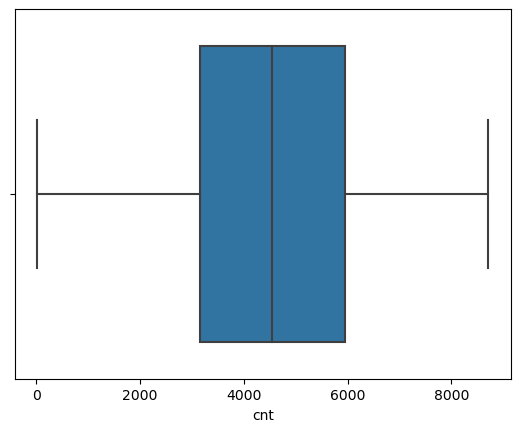

In [6]:
sns.boxplot(x=day_df['cnt'])
plt.show()

**Insight:**
- Kualitas data baik, tidak ada missing values, outlier dan duplikasi data
- kolom dteday masih object akan dikonversi ke datetime agar lebih mudah dianalisis secara time series

### Cleaning Data

In [7]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [8]:
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


**Insight:**
- Kolom dteday telah dikonversi menjadi tipe data datetime64. Ini mempermudah analisis berbasis waktu

## Exploratory Data Analysis (EDA)

### EDA 1

In [22]:
day_df.info(), day_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

(None,
    instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        1 2011-01-01       1   0     1        0        6           0   
 1        2 2011-01-02       1   0     1        0        0           0   
 2        3 2011-01-03       1   0     1        0        1           1   
 3        4 2011-01-04       1   0     1        0        2           1   
 4        5 2011-01-05       1   0     1        0        3           1   
 
    weathersit      temp     atemp       hum  windspeed  casual  registered  \
 0           2  0.344167  0.363625  0.805833   0.160446     331         654   
 1           2  0.363478  0.353739  0.696087   0.248539     131         670   
 2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
 3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
 4           1  0.226957  0.229270  0.436957   0.186900      82        1518   
 
     cnt  
 0   985  
 1   801  
 2  1349  
 3  1562  
 4  1600  )

In [24]:
usage_by_workingday = day_df.groupby('workingday')[['casual', 'registered']].mean().reset_index()

In [25]:
usage_by_workingday['workingday'] = usage_by_workingday['workingday'].map({0: 'Akhir Pekan / Libur', 1: 'Hari Kerja'})

In [26]:
usage_by_workingday

,workingday,casual,registered
0,Akhir Pekan / Libur,1371.134199,2959.034632
1,Hari Kerja,606.570000,3978.250000


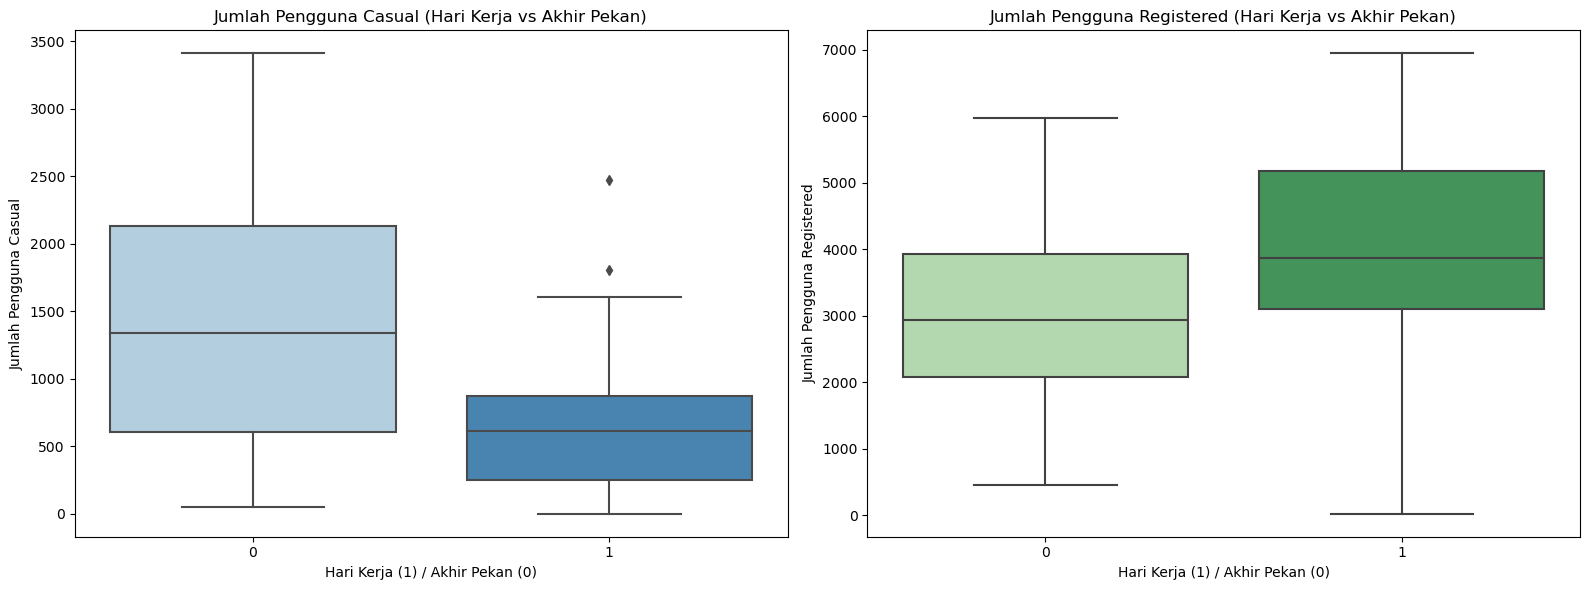

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))


sns.boxplot(x='workingday', y='casual', data=day_df, ax=axes[0], palette="Blues")
axes[0].set_title('Jumlah Pengguna Casual (Hari Kerja vs Akhir Pekan)')
axes[0].set_xlabel('Hari Kerja (1) / Akhir Pekan (0)')
axes[0].set_ylabel('Jumlah Pengguna Casual')

sns.boxplot(x='workingday', y='registered', data=day_df, ax=axes[1], palette="Greens")
axes[1].set_title('Jumlah Pengguna Registered (Hari Kerja vs Akhir Pekan)')
axes[1].set_xlabel('Hari Kerja (1) / Akhir Pekan (0)')
axes[1].set_ylabel('Jumlah Pengguna Registered')

plt.tight_layout()
plt.show()

### EDA 2

In [28]:
usage_by_weather = day_df.groupby('weathersit')[['casual', 'registered']].mean().reset_index()

In [29]:
weather_labels = {
    1: 'Cerah / Berawan ringan',
    2: 'Mendung / Berawan',
    3: 'Hujan ringan / Salju ringan',
    4: 'Cuaca ekstrem'
}
usage_by_weather['weathersit'] = usage_by_weather['weathersit'].map(weather_labels)

In [30]:
usage_by_weather

,weathersit,casual,registered
0,Cerah / Berawan ringan,964.030238,3912.755940
1,Mendung / Berawan,687.352227,3348.510121
2,Hujan ringan / Salju ringan,185.476190,1617.809524


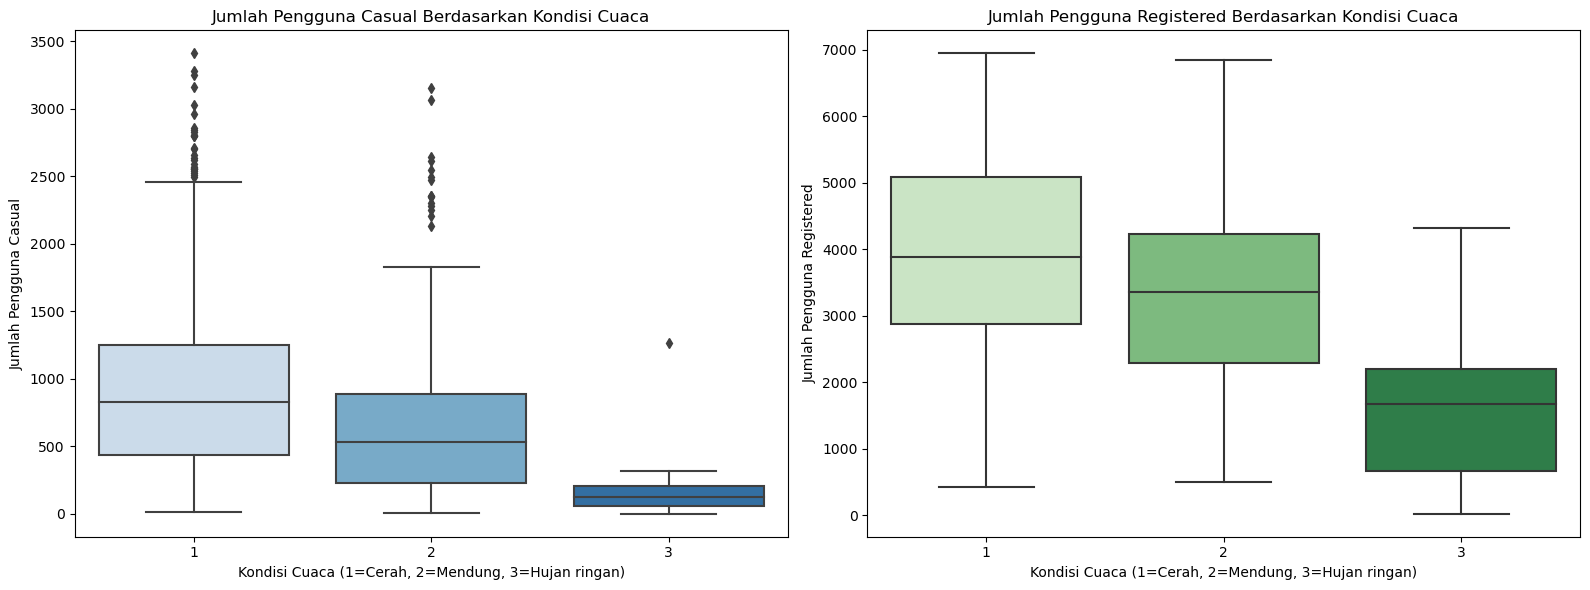

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x='weathersit', y='casual', data=day_df, ax=axes[0], palette="Blues")
axes[0].set_title('Jumlah Pengguna Casual Berdasarkan Kondisi Cuaca')
axes[0].set_xlabel('Kondisi Cuaca (1=Cerah, 2=Mendung, 3=Hujan ringan)')
axes[0].set_ylabel('Jumlah Pengguna Casual')

sns.boxplot(x='weathersit', y='registered', data=day_df, ax=axes[1], palette="Greens")
axes[1].set_title('Jumlah Pengguna Registered Berdasarkan Kondisi Cuaca')
axes[1].set_xlabel('Kondisi Cuaca (1=Cerah, 2=Mendung, 3=Hujan ringan)')
axes[1].set_ylabel('Jumlah Pengguna Registered')

plt.tight_layout()
plt.show()

### Visualisasi EDA 1 & 2

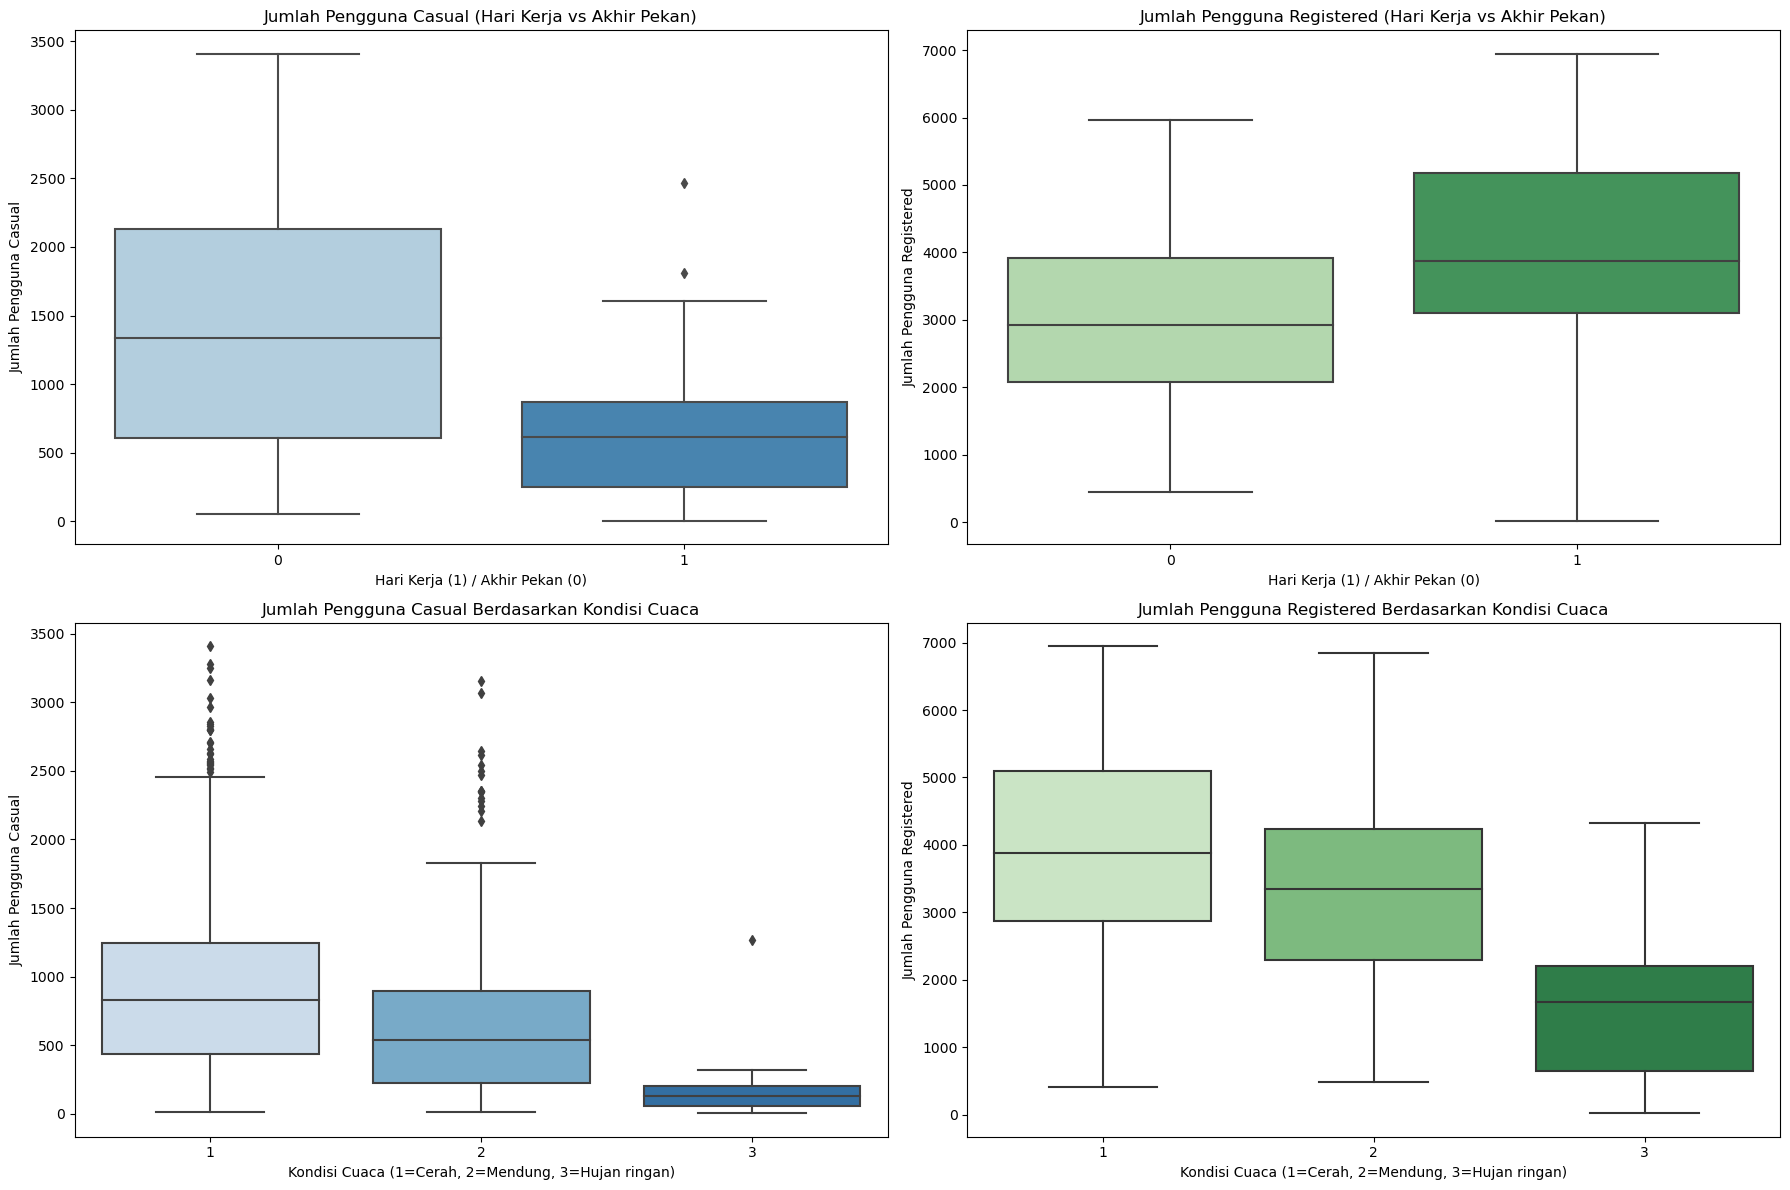

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.boxplot(x='workingday', y='casual', data=day_df, ax=axes[0, 0], palette="Blues")
axes[0, 0].set_title('Jumlah Pengguna Casual (Hari Kerja vs Akhir Pekan)')
axes[0, 0].set_xlabel('Hari Kerja (1) / Akhir Pekan (0)')
axes[0, 0].set_ylabel('Jumlah Pengguna Casual')

sns.boxplot(x='workingday', y='registered', data=day_df, ax=axes[0, 1], palette="Greens")
axes[0, 1].set_title('Jumlah Pengguna Registered (Hari Kerja vs Akhir Pekan)')
axes[0, 1].set_xlabel('Hari Kerja (1) / Akhir Pekan (0)')
axes[0, 1].set_ylabel('Jumlah Pengguna Registered')

sns.boxplot(x='weathersit', y='casual', data=day_df, ax=axes[1, 0], palette="Blues")
axes[1, 0].set_title('Jumlah Pengguna Casual Berdasarkan Kondisi Cuaca')
axes[1, 0].set_xlabel('Kondisi Cuaca (1=Cerah, 2=Mendung, 3=Hujan ringan)')
axes[1, 0].set_ylabel('Jumlah Pengguna Casual')

sns.boxplot(x='weathersit', y='registered', data=day_df, ax=axes[1, 1], palette="Greens")
axes[1, 1].set_title('Jumlah Pengguna Registered Berdasarkan Kondisi Cuaca')
axes[1, 1].set_xlabel('Kondisi Cuaca (1=Cerah, 2=Mendung, 3=Hujan ringan)')
axes[1, 1].set_ylabel('Jumlah Pengguna Registered')

plt.tight_layout()
plt.show()


**Insight:**
- pengguna casual lebih banyak saat akhir pekan, sedangkan pengguna terdaftar cenderung lebih aktif di hari kerja.
- Outlier tinggi pada pengguna casual di akhir pekan menunjukkan ada hari-hari khusus (misal event atau cuaca bagus) yang memicu lonjakan besar peminjaman.
- Saat cuaca cerah, peminjaman meningkat, terutama untuk pengguna terdaftar.
- Pengguna casual lebih sensitif terhadap kondisi cuaca buruk, terlihat dari penurunan drastis saat hujan ringan.
- Outlier tinggi pada pengguna casual di akhir pekan menunjukkan ada hari-hari khusus (misal event atau cuaca bagus) yang memicu lonjakan besar peminjaman.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda (casual vs registered) berbeda antara hari kerja dan akhir pekan?

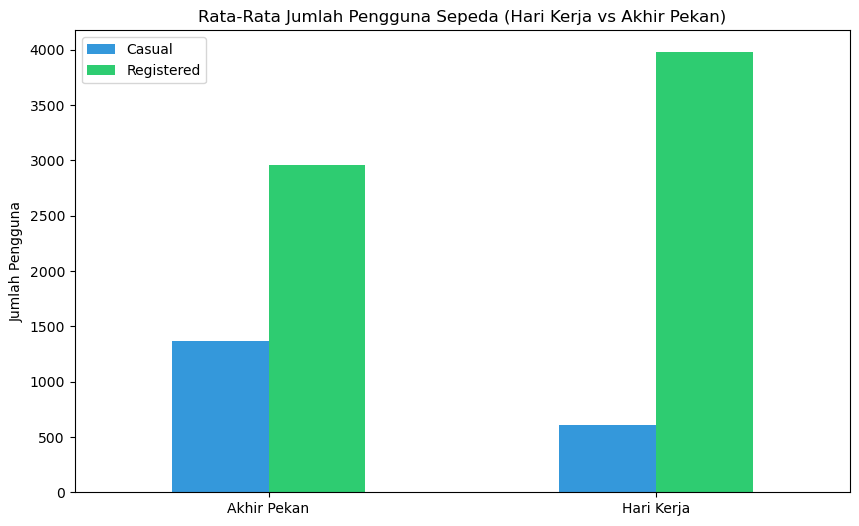

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

avg_usage_by_workingday = day_df.groupby('workingday')[['casual', 'registered']].mean().reset_index()
avg_usage_by_workingday['workingday'] = avg_usage_by_workingday['workingday'].map({0: 'Akhir Pekan', 1: 'Hari Kerja'})

avg_usage_by_workingday.set_index('workingday').plot(kind='bar', ax=ax, color=['#3498db', '#2ecc71'])
ax.set_title('Rata-Rata Jumlah Pengguna Sepeda (Hari Kerja vs Akhir Pekan)')
ax.set_xlabel('')
ax.set_ylabel('Jumlah Pengguna')
ax.legend(['Casual', 'Registered'])

plt.xticks(rotation=0)
plt.show()

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap pola peminjaman sepeda, baik untuk pengguna casual maupun registered?

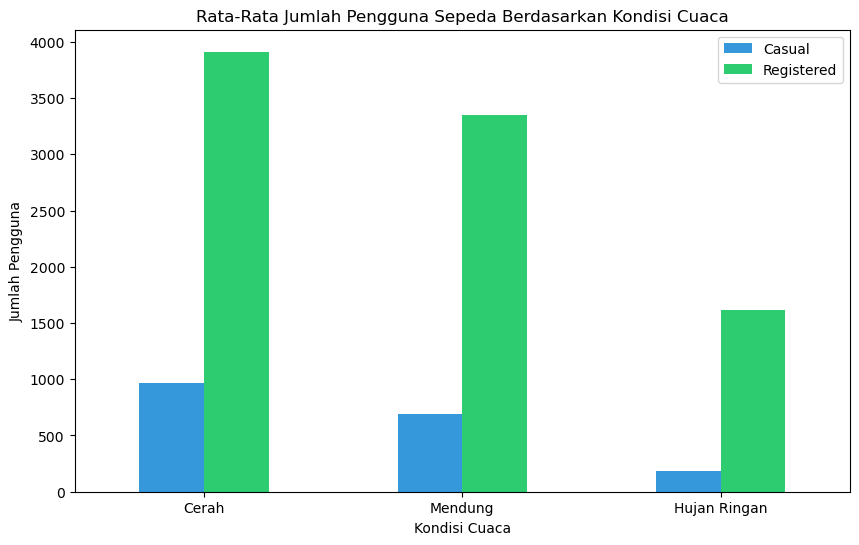

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))

avg_usage_by_weather = day_df.groupby('weathersit')[['casual', 'registered']].mean().reset_index()
avg_usage_by_weather['weathersit'] = avg_usage_by_weather['weathersit'].map({1: 'Cerah', 2: 'Mendung', 3: 'Hujan Ringan'})

avg_usage_by_weather.set_index('weathersit').plot(kind='bar', ax=ax, color=['#3498db', '#2ecc71'])
ax.set_title('Rata-Rata Jumlah Pengguna Sepeda Berdasarkan Kondisi Cuaca')
ax.set_xlabel('Kondisi Cuaca')
ax.set_ylabel('Jumlah Pengguna')
ax.legend(['Casual', 'Registered'])

plt.xticks(rotation=0)
plt.show()

**Insight:**
- Pengguna casual lebih banyak di akhir pekan, Kemungkinan besar mereka menggunakan sepeda untuk rekreasi atau aktivitas santai.
- Pengguna registered lebih banyak di hari kerja,Ini mengindikasikan mereka memakai sepeda untuk komuter ke kantor, kampus, atau aktivitas rutin.
- Pengguna casual sangat sensitif terhadap cuaca, Pemakaian tinggi saat cerah, tapi langsung turun saat hujan ringan.
- Pengguna registered lebih tahan cuaca, tapi tetap menurun saat hujan — artinya meskipun sepeda jadi pilihan utama, mereka masih terpengaruh faktor cuaca.

In [52]:
day_df.to_csv('main_data.csv', index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 = Pengguna casual lebih banyak meminjam sepeda saat akhir pekan, kemungkinan untuk aktivitas rekreasi atau bersantai.Pengguna registered cenderung lebih aktif saat hari kerja, kemungkinan untuk komuter ke tempat kerja atau kampus. Ada peluang besar untuk meningkatkan peminjaman sepeda dengan strategi berbeda untuk hari kerja dan akhir pekan. Fokus pada kenyamanan rute & fasilitas komuter saat weekday, dan promo/event rekreasi saat weekend bisa menjadi kunci pertumbuhan bisnis.

- Conclution pertanyaan 2 = Cuaca cerah mendorong lebih banyak peminjaman, terutama dari pengguna casual.Cuaca mendung & hujan ringan mengurangi peminjaman, terutama untuk pengguna casual, meskipun pengguna registered masih relatif stabil. Cuaca sangat memengaruhi keputusan pengguna untuk meminjam sepeda, terutama pengguna casual. Layanan tambahan seperti jas hujan gratis, prediksi cuaca, dan promo saat hujan ringan bisa mengurangi dampak negatif cuaca buruk terhadap jumlah peminjaman.